In [1]:
%matplotlib inline


Sparse time artifact removal on simulated data
==============================================

This example is similar to test_nt_star.m in Noisetools. Results are equivalent
(within numerical precision) to the Matlab code.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

from meegkit import star
from meegkit.utils import demean, normcol

# import config

Create simulated data
-----------------------------------------------------------------------------
Simulated data consist of N channels, 1 sinusoidal target, N-3 noise sources,
with temporally local artifacts on each channel.



In [3]:
# Create simulated data
nchans = 10
n_samples = 1000
f = 2
target = np.sin(np.arange(n_samples) / n_samples * 2 * np.pi * f)
target = target[:, np.newaxis]
noise = np.random.randn(n_samples, nchans - 3)

# Create artifact signal
SNR = np.sqrt(1)
x0 = (normcol(np.dot(noise, np.random.randn(noise.shape[1], nchans))) +
      SNR * target * np.random.randn(1, nchans))
x0 = demean(x0)
artifact = np.zeros(x0.shape)
for k in np.arange(nchans):
    artifact[k * 100 + np.arange(20), k] = 1
x = x0 + 10 * artifact

# This is to compare with matlab numerically
# from scipy.io import loadmat
# mat = loadmat('/Users/nicolas/Toolboxes/NoiseTools/TEST/X.mat')
# x = mat['x']
# x0 = mat['x0']

Apply STAR
-----------------------------------------------------------------------------



In [4]:
y, w, _ = star.star(x, 2)

proportion artifact free: 0.70
proportion artifact free: 0.70
proportion artifact free: 0.70
depth: 1
fixed channels: 10
fixed samples: 303
ratio: 1.01
power ratio: 0.41


Plot results
-----------------------------------------------------------------------------



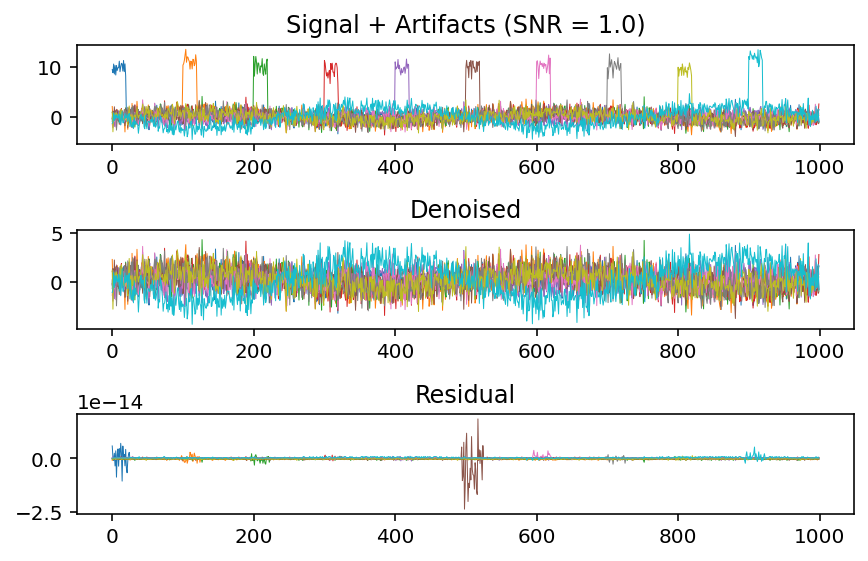

In [5]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.plot(x, lw=.5)
ax1.set_title('Signal + Artifacts (SNR = {})'.format(SNR))
ax2.plot(y, lw=.5)
ax2.set_title('Denoised')
ax3.plot(demean(y) - x0, lw=.5)
ax3.set_title('Residual')
f.set_tight_layout(True)
plt.show()